In [3]:
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)
     

2.11.0


In [4]:

# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

40000


In [5]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


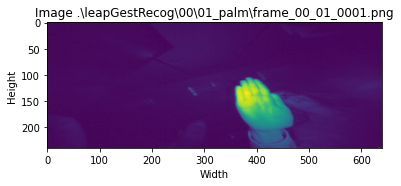

In [6]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array


In [12]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  category = path.split("\\")[3] # use / for linux and mac and \\ for windows
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  40000
Labels loaded:  40000
1 .\leapGestRecog\00\01_palm\frame_00_01_0001.png


In [13]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [14]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [15]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [17]:

# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
438/438 - 841s - loss: 1.3998 - accuracy: 0.5188 - val_loss: 0.8166 - val_accuracy: 0.5275 - 841s/epoch - 2s/step
Epoch 2/5
438/438 - 896s - loss: 0.7705 - accuracy: 0.5435 - val_loss: 0.7604 - val_accuracy: 0.5218 - 896s/epoch - 2s/step
Epoch 3/5
438/438 - 872s - loss: 0.7327 - accuracy: 0.5406 - val_loss: 0.7428 - val_accuracy: 0.5217 - 872s/epoch - 2s/step
Epoch 4/5
438/438 - 847s - loss: 0.7127 - accuracy: 0.5422 - val_loss: 0.7534 - val_accuracy: 0.5082 - 847s/epoch - 2s/step
Epoch 5/5
438/438 - 901s - loss: 0.6992 - accuracy: 0.5471 - val_loss: 0.7404 - val_accuracy: 0.5038 - 901s/epoch - 2s/step


In [18]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

375/375 [==============================] - 75s 199ms/step - loss: 0.7404 - accuracy: 0.5038
Test accuracy: 50.38%


In [20]:
predictions = model.predict(X_test) # Make predictions towards the test set


375/375 [==============================] - 73s 196ms/step


In [21]:
np.argmax(predictions[0]), y_test[0] # If same, got it right


(6, 6)

In [24]:
import cv2

In [42]:
# Initialize the webcam for Hand Gesture Recognition Python project
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

while True:
    X=[]
    # Read each frame from the webcam
    _, frame = cap.read()
    x , y, c = frame.shape
    # print(frame.shape)

    # don't know if this matters
    # Flip the frame vertically
    # frame = cv2.flip(frame, 1)


    # convert frame to black and white
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (320, 120))

    # print(frame.shape)

    X.append(img)
    
    X = np.array(X, dtype="uint8")
    X = X.reshape(1, 120, 320, 1) # Needed to reshape so CNN knows it's different images
    # print(X.shape)
    prediction = model.predict(X, verbose=0)
    # print(np.argmax(prediction))
    

    # Show the final output
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow("Output", frame)
    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
